<a href="https://colab.research.google.com/github/subhash505/datat_analytics/blob/main/jm_Markowitz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Assume the weight steps of 10%:

In [ ]:
ExpectedReturn = [9.00,9.20,9.40,9.60,9.80,10.00,10.20,10.40,10.60,10.80,11.00]
StandardDeviation = [8.0,7.5,7.1,6.9,6.8,7.0,7.3,7.8,8.5,9.2,10.0]

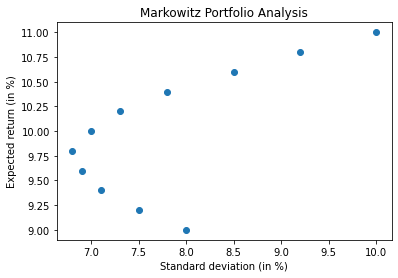

In [ ]:
plt.scatter(StandardDeviation, ExpectedReturn)
plt.xlabel("Standard deviation (in %)")
plt.ylabel("Expected return (in %)")
plt.title("Markowitz Portfolio Analysis")
plt.show()

In [ ]:
pip install --upgrade pandas-datareader

     |████████████████████████████████| 109 kB 8.7 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:

from pandas_datareader import data as dr


In [ ]:
stocks = ['PG', 'MSFT']

In [ ]:
stock_data = pd.DataFrame()
for s in stocks:
    stock_data[s] = dr.DataReader(s, data_source = 'yahoo', start = '2009-12-31',end='2020-04-09')['Adj Close']

In [ ]:
stock_data.head()

,PG,MSFT
Date,,
2009-12-31,42.389099,23.630186
2010-01-04,42.731663,23.994564
2010-01-05,42.745663,24.002319
2010-01-06,42.542900,23.855013
2010-01-07,42.312191,23.606922


In [ ]:
stock_data.tail()

,PG,MSFT
Date,,
2020-04-03,110.884827,151.931671
2020-04-06,113.515297,163.230530
2020-04-07,108.659035,161.472458
2020-04-08,110.904099,163.092239
2020-04-09,110.480141,163.102097


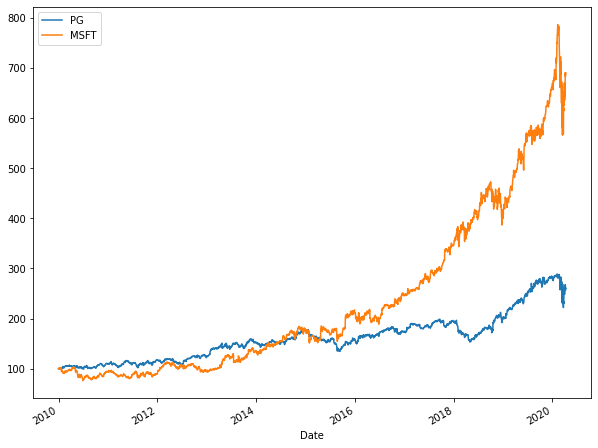

In [ ]:
(stock_data/stock_data.iloc[0] * 100).plot(figsize = (10,8))

In [ ]:
logReturns = np.log(stock_data/stock_data.shift(1))
logReturns

,PG,MSFT
Date,,
2009-12-31,NaN,NaN
2010-01-04,0.008049,0.015302
2010-01-05,0.000328,0.000323
2010-01-06,-0.004755,-0.006156
2010-01-07,-0.005438,-0.010454
...,...,...
2020-04-03,0.005926,-0.009253
2020-04-06,0.023446,0.071733
2020-04-07,-0.043723,-0.010829


In [ ]:
#To obtain annual average returns!
logReturns.mean() * 250 

PG      0.092645
MSFT    0.186833
dtype: float64

In [ ]:
#To obtain annual covariance between PG and Microsoft
logReturns.cov() * 250 

,PG,MSFT
PG,0.029078,0.019192
MSFT,0.019192,0.061942


In [ ]:
stock_data.corr()

,PG,MSFT
PG,1.000000,0.925085
MSFT,0.925085,1.000000


In [ ]:
# Dynamically generating weights code
numberOfStocks = len(stocks)
numberOfStocks

2

In [ ]:
#random weights
#weights = np.random.random(numberOfStocks)
#weights = weights/np.sum(weights)


In [ ]:
weights1 = [0.19018562, 0.93358835]

weights1

[0.19018562, 0.93358835]

In [ ]:
weights = weights1/np.sum(weights1)#rebalance
weights

array([0.16923832, 0.83076168])

Calculating expected return of portfolio

In [ ]:
(weights * logReturns.mean()).sum() * 250

0.1708925568727753

Expected standard deviance or volatility


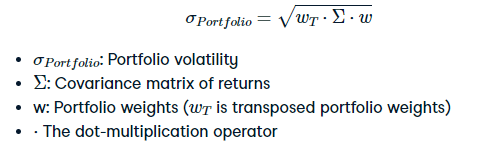

In [ ]:
np.sqrt(np.dot(weights.T, np.dot(logReturns.cov() * 250, weights)))

0.2213135854703171

In [ ]:

expectedReturn = []
standardDeviation = []
weightList0 = []
weightList1 = []

# Running simulations for finding optimum weights
for i in range(100):
    weights = np.random.random(numberOfStocks)
    weights = weights/ weights.sum()
    weightList0.append(weights[0])
    weightList1.append(weights[1])
    expectedReturn.append((weights * logReturns.mean()).sum() * 250)
    standardDeviation.append(np.sqrt(np.dot(weights.T, np.dot(logReturns.cov() * 250, weights))))

#Converting lists into arrays
weightList0 = np.array(weightList0) #Weights for PG
weightList1 = np.array(weightList1) #Weights for MSFT
expectedReturn = np.array(expectedReturn) 
standardDeviation = np.array(standardDeviation)

#Creating dataframe
df = pd.DataFrame({"Weight of PG": weightList0, "Weight of MSFT": weightList1, "Expected Return": expectedReturn, "Standard deviation": standardDeviation})
df.head()

,Weight of PG,Weight of MSFT,Expected Return,Standard deviation
0,0.250093,0.749907,0.163277,0.209407
1,0.226214,0.773786,0.165526,0.212824
2,0.947472,0.052528,0.097592,0.167883
3,0.813797,0.186203,0.110183,0.164989
4,0.521993,0.478007,0.137667,0.177915


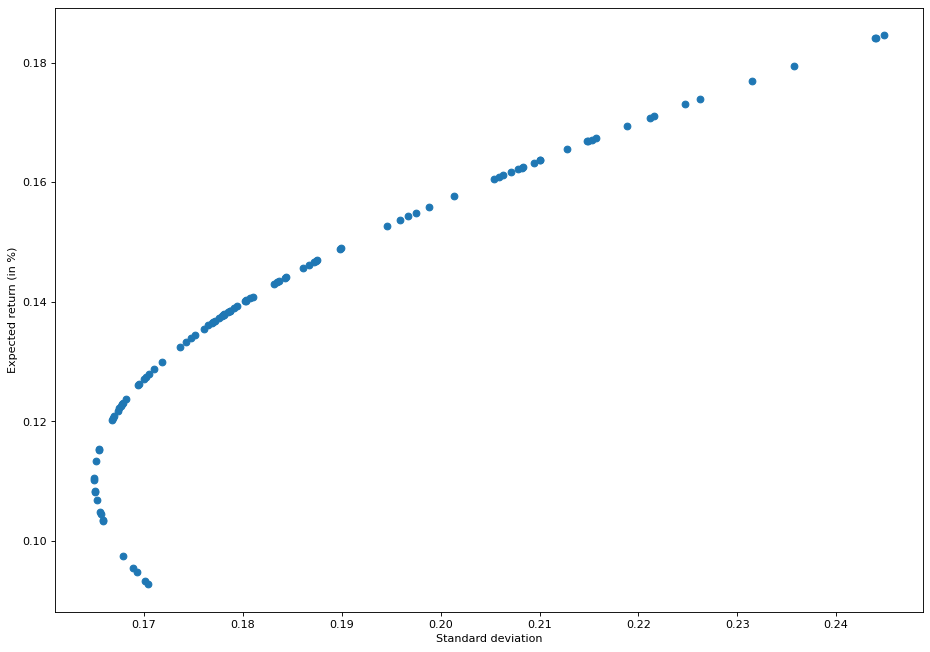

In [ ]:
plt.figure(figsize=(14, 10), dpi=80)
plt.scatter(df["Standard deviation"], df["Expected Return"])
plt.xlabel("Standard deviation")
plt.ylabel("Expected return (in %)")
plt.show()

In [ ]:
df[(df["Expected Return"]>0.11) & (df["Expected Return"]< 0.12)].sort_values(by=['Expected Return'])


,Weight of PG,Weight of MSFT,Expected Return,Standard deviation
3,0.813797,0.186203,0.110183,0.164989
19,0.810772,0.189228,0.110468,0.164989
62,0.780394,0.219606,0.113329,0.165149
27,0.760145,0.239855,0.115236,0.165420
83,0.758496,0.241504,0.115391,0.165447


In [ ]:
df[(df["Expected Return"]>0.11)].sort_values(by=['Expected Return']).head(10)


,Weight of PG,Weight of MSFT,Expected Return,Standard deviation
3,0.813797,0.186203,0.110183,0.164989
19,0.810772,0.189228,0.110468,0.164989
62,0.780394,0.219606,0.113329,0.165149
27,0.760145,0.239855,0.115236,0.165420
83,0.758496,0.241504,0.115391,0.165447
87,0.707479,0.292521,0.120197,0.166728
28,0.703269,0.296731,0.120593,0.166870
18,0.699465,0.300535,0.120951,0.167003
34,0.690390,0.309610,0.121806,0.167338
73,0.685657,0.314343,0.122252,0.167522


In [ ]:
df["Expected Return"].mean()

0.13970579195729663

In [ ]:
df["Expected Return"].sort_values().median()

0.13871557436296944

In [ ]:
df[(df["Expected Return"]>0.135)].sort_values(by=['Expected Return'])


,Weight of PG,Weight of MSFT,Expected Return,Standard deviation
20,0.544838,0.455162,0.135515,0.176020
51,0.538649,0.461351,0.136098,0.176520
78,0.534410,0.465590,0.136498,0.176868
77,0.533600,0.466400,0.136574,0.176935
45,0.530503,0.469497,0.136866,0.177193
...,...,...,...,...
67,0.104427,0.895573,0.176997,0.231490
94,0.077995,0.922005,0.179487,0.235783
46,0.029292,0.970708,0.184074,0.243891
57,0.028405,0.971595,0.184157,0.244041


In [ ]:
df.loc[15]

Weight of PG          0.512981
Weight of MSFT        0.487019
Expected Return       0.138516
Standard deviation    0.178699
Name: 15, dtype: float64